In [2]:
# https://medium.com/@hirok4/python-implementation-of-ellipse-fitting-e8801dbb16a8

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '..\\..\\HDF5')
sys.path.insert(2, '..\\')
sys.path.insert(3, '..\\Res_spectroscopy')
from HDF5 import *
from matplotlib.patches import Ellipse
from ellipse import LsqEllipse
import Tools

In [2]:
# dictionary = load_hdf5_to_dict('Mixer_1135_5GHz.h5')
# # dictionary = load_hdf5_to_dict("I:\\Il mio Drive\\Università\\UniMiB - Archivio di Federico Shin'ichi Finardi\\02_Magistrale\\Laboratorio di Criogenia\\data\\panciaut-FAC_SIMILE\\amplitrixCASA_IQMixer.hdf5")
# # power = 'p05'
# freq  = 'f05'

# Q = dictionary['freqs'][freq]['Q']
# I = dictionary['freqs'][freq]['I']

In [ ]:
# dictionary = load_hdf5_to_dict('..\\Res_spectroscopy\\Mixer_1135_9.7GHz.h5')
# # dictionary = load_hdf5_to_dict("I:\\Il mio Drive\\Università\\UniMiB - Archivio di Federico Shin'ichi Finardi\\02_Magistrale\\Laboratorio di Criogenia\\data\\panciaut-FAC_SIMILE\\amplitrixCASA_IQMixer.hdf5")
# # power = 'p05'
# freq  = 'f05'

# Q = Tools.find_key(dictionary, 'Q')
# I = Tools.find_key(dictionary, 'I')


# # Plot the noisy data
# cln_pts = 50                # clean points for I-Q plane
# I =  I[cln_pts:-cln_pts]
# Q =  Q[cln_pts:-cln_pts]

# fig = plt.figure(figsize=(6, 6))
# ax = plt.subplot()
# ax.axis('equal')
# ax.scatter(Q, I, label = 'Data points')

# plt.xlabel('Q')
# plt.ylabel('I')
# plt.grid()
# plt.legend()
# plt.show()

center	: (0.000, 0.001)
width	: 0.074
height	: 0.070
phi	: 0.951
-----------------------------
a	: -0.7188978707881544
b	: 0.08404369070076952
c	: -0.6900163109881184
d	: -3.6078881817828606e-05
f	: 0.0008628277436297567
g	: 0.0036360627795537933
-----------------------------
316.228
Attenuation is:    0.23472096470053563
Delta dBm is :    12.58895594417467


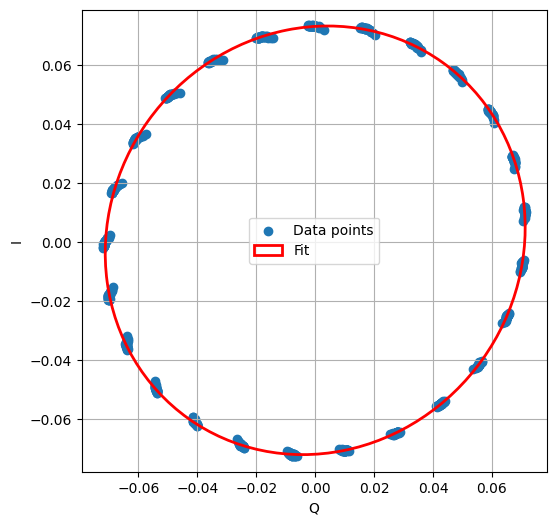

In [18]:
# https://github.com/ehtec/least-squares-ellipse-fitting/blob/master/ellipse.py

dictionary = load_hdf5_to_dict('..\\Res_spectroscopy\\Mixer_1135_5.0GHz.h5')
# dictionary = load_hdf5_to_dict("I:\\Il mio Drive\\Università\\UniMiB - Archivio di Federico Shin'ichi Finardi\\02_Magistrale\\Laboratorio di Criogenia\\data\\panciaut-FAC_SIMILE\\amplitrixCASA_IQMixer.hdf5")
# power = 'p05'
freq  = 'f05'

Q = Tools.find_key(dictionary, 'Q')
I = Tools.find_key(dictionary, 'I')


# Plot the noisy data
cln_pts = 50                # clean points for I-Q plane
I =  I[cln_pts:-cln_pts]
Q =  Q[cln_pts:-cln_pts]

import numpy as np
import LsqEllipse as Lsq
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

X = np.array(list(zip(Q, I)))
reg = Lsq.LsqEllipse().fit(X)
center, width, height, phi = reg.as_parameters()
a, b, c, d, f, g = reg.coefficients

print(f'center	: ({center[0]:.3f}, {center[1]:.3f})')
print(f'width	: {width:.3f}')
print(f'height	: {height:.3f}')
print(f'phi	: {phi:.3f}')
print('-----------------------------')
print(f'a	: {a}')
print(f'b	: {b}')
print(f'c	: {c}')
print(f'd	: {d}')
print(f'f	: {f}')
print(f'g	: {g}')
print('-----------------------------')
print(Tools.find_key(dictionary, 'power_(mV peak)'))


maxes = max(width, height)                                      # maxes è il semiasse più grande dell'ellisse. Sarà giusto?
Attenuation = (maxes*1e3/Tools.find_key(dictionary, 'power_(mV peak)'))

print('Attenuation is:   ', Attenuation)

print('Delta dBm is :   ', Tools.find_key(dictionary, 'power_(dBm)') - Tools.mVpk_to_dBm(maxes*1e3))

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.scatter(Q, I, zorder=1, label = 'Data points')
ellipse = Ellipse(
    xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
    edgecolor='r', fc='None', lw=2, label='Fit', zorder=2
)
ax.add_patch(ellipse)

plt.xlabel('Q')
plt.ylabel('I')
plt.grid()
plt.legend()
plt.show()

In [5]:
# # Traslation and rotation
# q = Q-center[0]
# i = I -center[1]
# q_rot = i * np.sin(phi) + q*np.cos(phi)
# i_rot = i*np.cos(phi) - q*np.sin(phi)
# plt.scatter(q_rot, i_rot)

In [27]:

Tools.dBm_to_mVpk(dictionary['power_(dBm)'])
a = Tools.mVpk_to_dBm(41) + 7
print(a)

-10.744322865605287


# NOTE
**Coefficiente g:** 
Pare venire sempre la metà di I. Invece no, o c'è errore nel cacolo di Davide, o in nomi variabili di LsqEllipse, o presa dati o non lo so.

**Shit Fact:** 
I e Q non hanno stessa ampiezza nella presa dati: Ci sta, è colpa della non linearità del Mixer.